## INTRO MACHINE LEARNING

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Los objetivos de hoy son:

Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

Realizar un EDA sencillo para la variable dependiente y la variable independiente.


In [2]:
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings

pd.options.display.max_columns = None

In [3]:
df= pd.read_csv('../files/life_data.csv', index_col=0)

---

Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [4]:
df.shape

(2938, 21)

In [5]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expen

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.describe(include='object')

,Status
count,2938
unique,2
top,Developing
freq,2426


In [9]:
df.duplicated().sum()

0

In [10]:
numericas = df.select_dtypes(include= np.number)

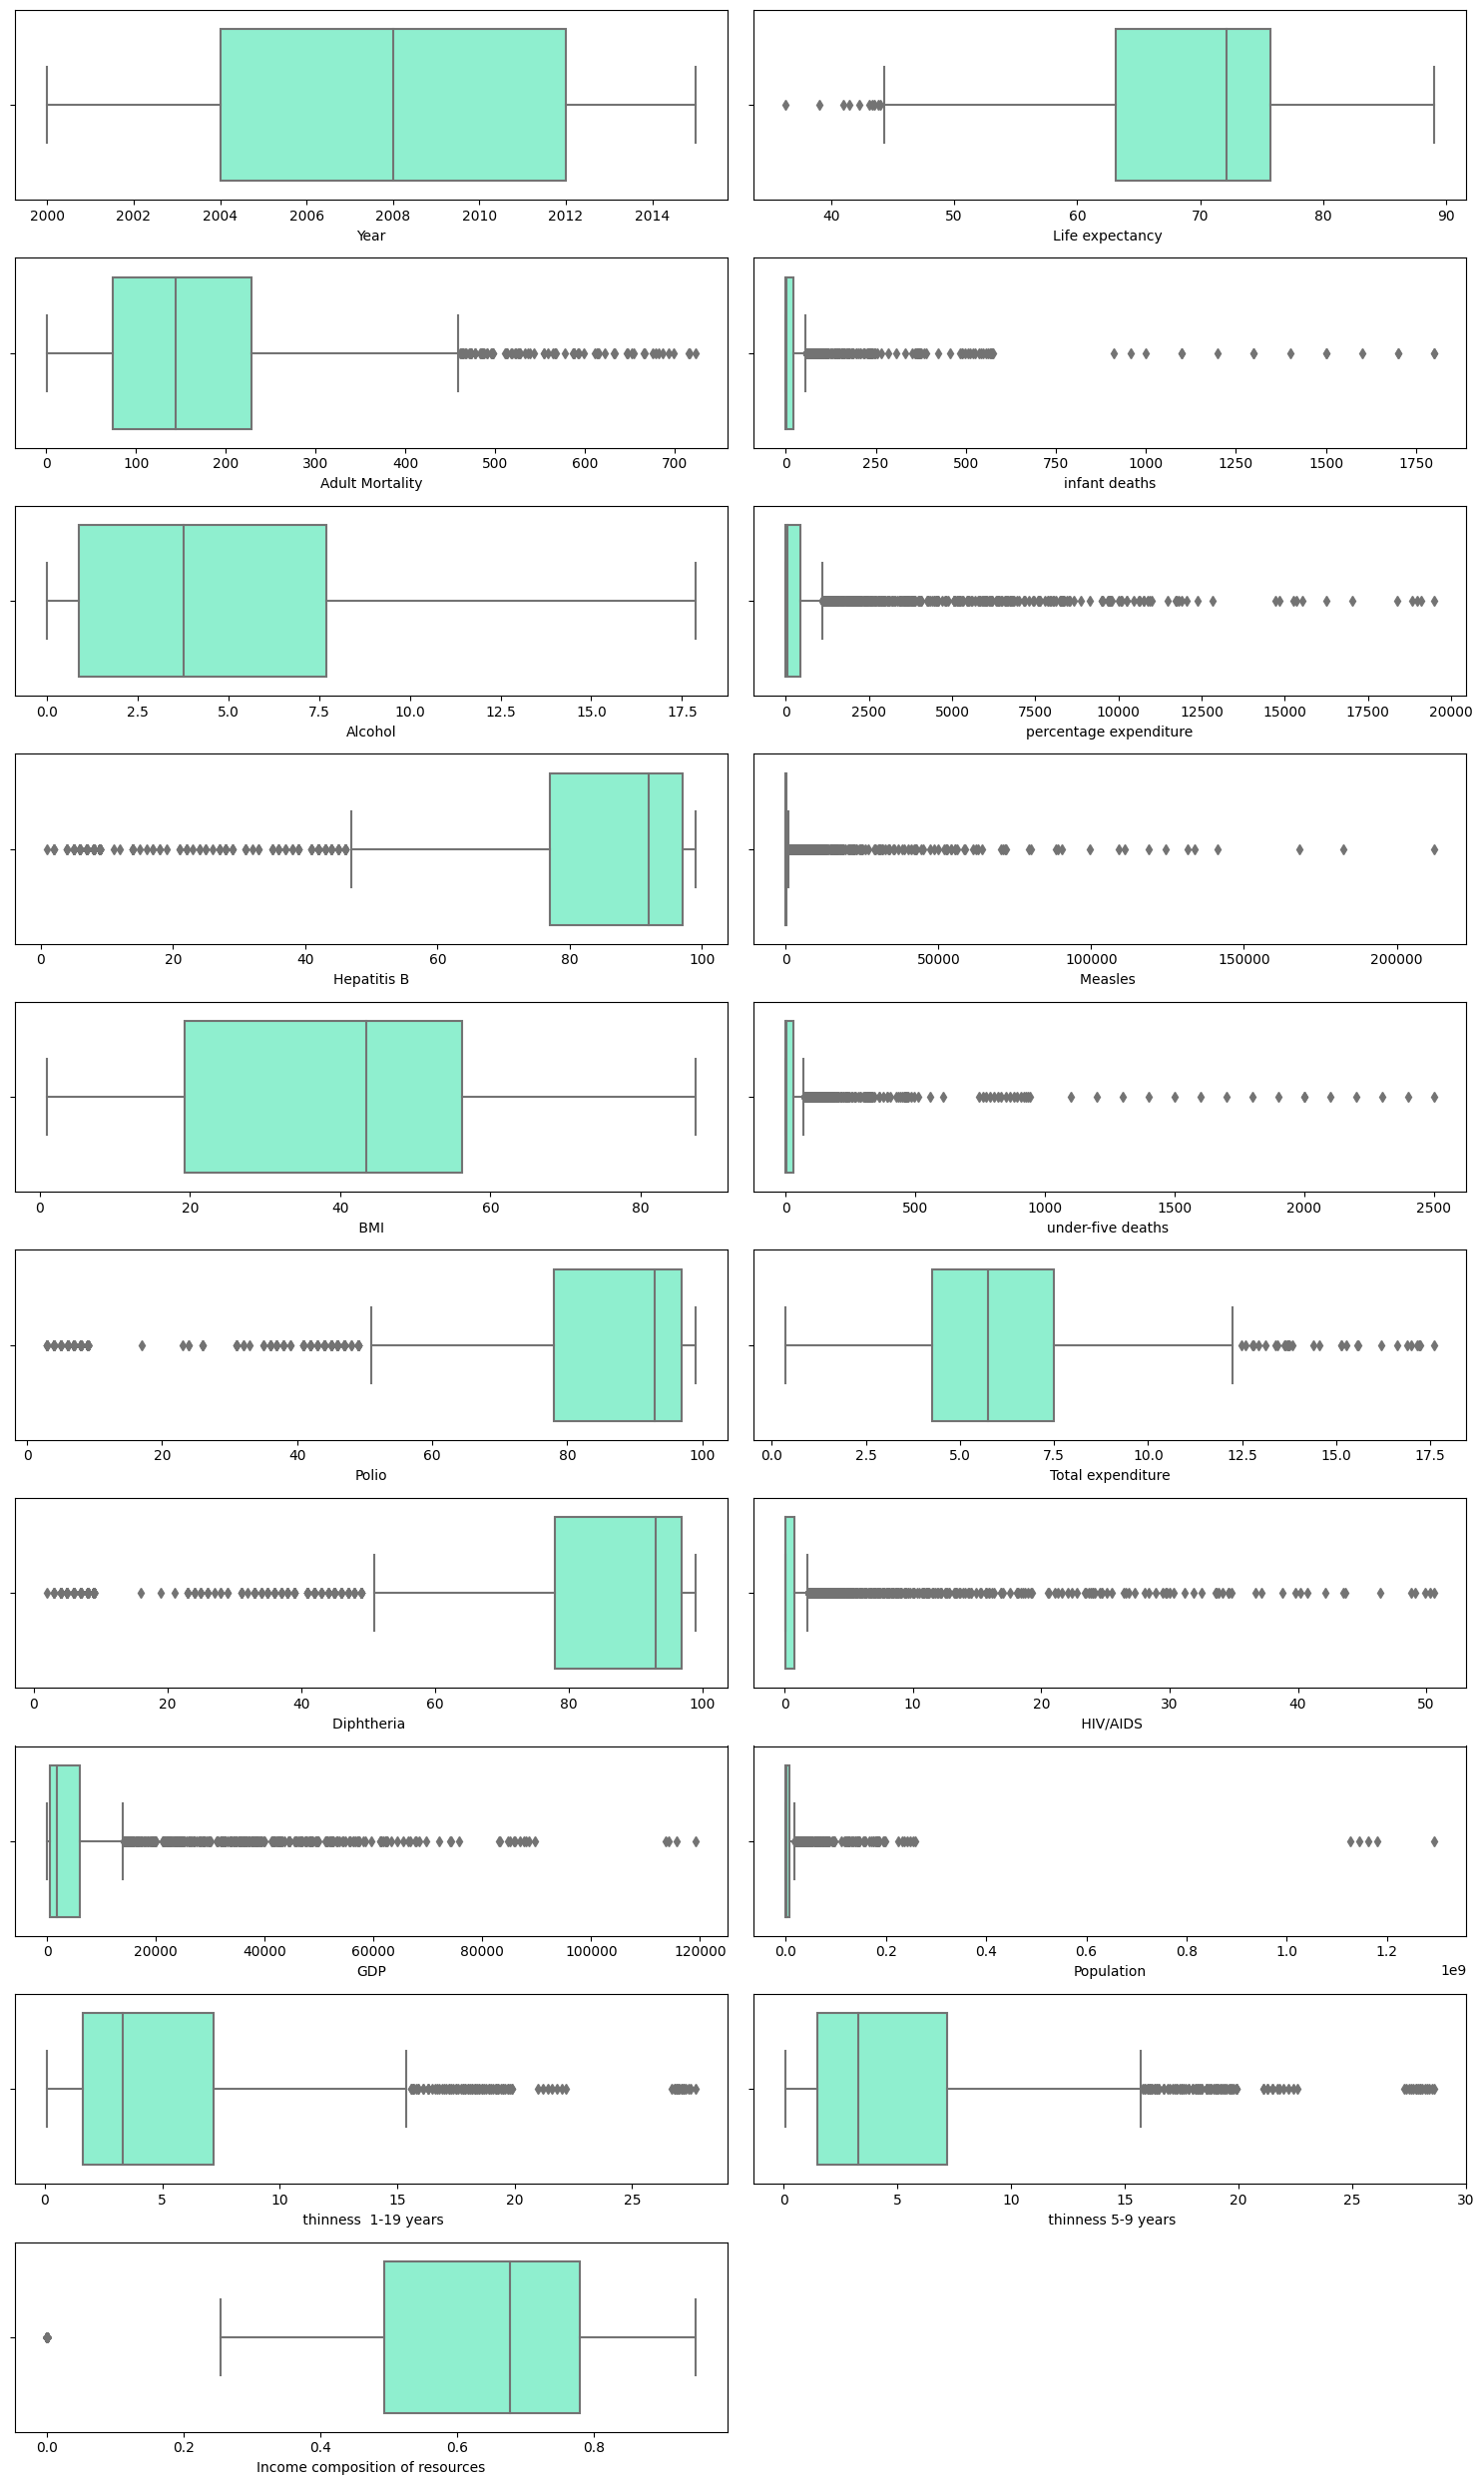

In [11]:
fig, axes = plt.subplots(10, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [12]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

---

### Homogenizar las columnas

In [13]:
df.reset_index(inplace=True)

In [14]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

In [15]:
df.rename(columns = cambio_columnas, inplace=True)

In [16]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.

In [17]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

Columnas:

- 'Year'= Año de la observación

- 'Status'= Developped o Developping

- 'Life expectancy '=  Expectativa de vida en años

- 'Adult Mortality'= Mortalidad de Adultos

- 'infant deaths'= Tasas de mortalidad de adultos de ambos sexos (probabilidad de morir entre los 15 y los 60 años por 1000

- 'Alcohol'= Consumo en litros de alcohol puro per capita para mayores de 15 años al año.

- 'percentage expenditure'= Gasto sanitario en porcentaje del Producto Interior Bruto per cápita(%)

- 'Hepatitis B'= Cobertura de vacunación contra la hepatitis B (HepB) entre niños de 1 año (%)

- 'Measles '= Sarampión - número de casos notificados por 1000 habitantes

- ' BMI '= Índice de masa corporal medio de toda la población

- 'under-five deaths '= Número de muertes de menores de 5 años por 1000 habitantes

- 'Polio'= Polio (Pol3) immunization coverage among 1-year-olds (%)

- 'Total expenditure'= Gasto de las administraciones públicas en sanidad como porcentaje del total de las administraciones públicas

- 'Diphtheria '= Cobertura de vacunación contra la difteria, el tétanos y la tos ferina (DTP3) en niños de 1 año (%)

- ' HIV/AIDS' = Muertes por cada 1 000 nacidos vivos VIH/SIDA (0-4 años)

- 'GDP'= Producto Interior Bruto per cápita (en USD)

- 'Population'= Población del país

- ' thinness  1-19 years'= Prevalencia de la delgadez entre niños y adolescentes de 10 a 19 años (% )

- ' thinness 5-9 years'= Prevalencia de la delgadez entre los niños de 5 a 9 años(%)

- 'Income composition of resources'= Índice de Desarrollo Humano en función de la composición de los recursos (índice de 0 a 1)

- 'Schooling'= Número de años de escolarización(años)

In [18]:
df.corr()

/tmp/ipykernel_2190/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


VARIABLE RESPUESTA:


Life_Expectancy

In [19]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [20]:
df["status"].value_counts()

Developing    2426
Developed      512
Name: status, dtype: int64

In [21]:
df_desarrollados = df[df["status"] == "Developed"]
df_desarrollados.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,93.0,74,66.6,1,93.0,NaN,93.0,0.1,56554.3876,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,91.0,340,66.1,1,92.0,9.42,92.0,0.1,62214.6912,2346694.0,0.6,0.6,0.936,20.4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [23]:
df_desarrollados.to_csv("../files/desarrollados.csv")

In [24]:
df_endesarrollo = df[df["status"] == "Developing"]
df_endesarrollo.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [25]:
# !pip install a-world-of-countries #Instalacion de libreria

In [81]:
import awoc

In [82]:
# Initialize the AWOC class.
my_world = awoc.AWOC()

In [83]:
continentes= my_world.get_continents_list()
continentes

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America']

In [95]:
for x in my_world.get_continents_list():
    # print (x)
    for 
    if df["country"].isin(Africa):


Africa
Antarctica
Asia
Europe
North America
Oceania
South America


In [94]:
paises= my_world.get_countries_list_of()

TypeError: get_countries_list_of() missing 1 required positional argument: 'continent_name'

In [48]:
africa= my_world.get_countries_list_of('Africa')
antartica = my_world.get_countries_list_of('Antarctica')
asia= my_world.get_countries_list_of('Asia')
europa= my_world.get_countries_list_of("Europe")
norte_america= my_world.get_countries_list_of('North America')
oceania= my_world.get_countries_list_of('Oceania')
sur_america= my_world.get_countries_list_of('South America')

In [ ]:
for 

In [92]:
africa

['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Democratic Republic of the Congo',
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Ivory Coast',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mayotte',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Republic of the Congo',
 'Reunion',
 'Rwanda',
 'Saint Helena',
 'Sao Tome and Principe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Swaziland',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Western Sahara',
 'Zambia',
 'Zimbabwe']

In [ ]:
dic_paises = {}
if x in 

In [93]:
for x in df["country"].unique():
    # print(x)
    if x in africa:
        if df["country"] == x:
            df["continente"] = "África"
        else:
            pass
    elif x in antartica:
        if df["country"] == x:
            df["continente"] = "Antártica"
        else:
            pass
    elif x in asia:
        if df["country"] == x:
            df["continente"] = "Asia"
        else:
            pass
    elif x in europa:
        df["continente"] = "Europa"
    elif x in norte_america:
        df["continente"] = "Norte América"
    elif x in oceania:
        df["continente"] = "Oceanía"
    else:
        df["continente"] = "Sur América"

        df.loc[df["country"] == x, [‘europa’]] = ‘SI’      

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [91]:
df.sample(20)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,continente
473,Cambodia,2006,Developing,64.1,216.0,17,2.03,51.504471,8.0,188,14.3,21,8.0,4.48,8.0,1.1,539.879153,13474489.0,11.4,11.6,0.483,10.1,África
1658,Mauritania,2008,Developing,61.4,217.0,8,0.02,61.762638,74.0,4,26.1,12,73.0,3.23,74.0,1.3,1167.535689,347541.0,9.2,8.9,0.475,7.2,África
2056,Portugal,2014,Developed,89.0,78.0,0,9.88,271.254553,98.0,0,6.9,0,98.0,9.50,98.0,0.1,2277.536130,14162.0,0.7,0.5,0.837,16.8,África
2003,Paraguay,2003,Developing,71.7,166.0,4,6.64,155.423308,86.0,0,41.3,4,86.0,5.99,86.0,0.1,1174.779347,56795.0,2.4,2.3,0.642,12.7,África
2226,Sao Tome and Principe,2006,Developing,64.7,22.0,0,5.46,47.089311,75.0,0,24.0,0,97.0,7.84,97.0,1.2,843.894470,159328.0,6.9,6.8,0.521,10.2,África
1231,Iran (Islamic Republic of),2002,Developing,71.2,142.0,31,0.01,0.000000,99.0,9554,46.2,37,99.0,5.39,99.0,0.1,NaN,NaN,7.6,7.7,0.674,11.9,África
2795,United States of America,2014,Developed,79.1,14.0,23,8.82,0.000000,92.0,667,69.1,27,93.0,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN,África
1040,Greece,2001,Developing,78.7,83.0,1,8.62,1403.022211,9.0,12,58.0,1,9.0,8.47,91.0,0.1,12538.178830,1862132.0,0.9,0.8,0.801,14.2,África
1062,Guatemala,2011,Developing,71.1,193.0,11,2.16,457.774585,88.0,0,47.9,14,88.0,6.28,88.0,0.4,3187.845296,14948919.0,1.2,1.2,0.609,10.5,África
1357,Kazakhstan,2004,Developing,64.7,287.0,8,6.55,33.916602,99.0,2204,45.8,9,99.0,3.95,82.0,0.1,2874.288291,1512985.0,2.5,2.6,0.725,13.5,África


In [86]:
df["continente"].unique()

array(['África'], dtype=object)

In [26]:
df.to_csv("../files/life_data_limp.csv")